<a href="https://colab.research.google.com/github/Limpapat/Python101/blob/main/scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 101 : SciPy : Linear Algebra in Python
by Limpapat Bussaban

30/08/2021

[SciPy] Scientific computing tools for Python https://www.scipy.org 

[Datacamp] Cheat sheets http://datacamp-community-prod.s3.amazonaws.com/dfdb6d58-e044-4b38-bab3-5de0b825909b

In [1]:
!pip list -v | grep [Ss]cipy

scipy                         1.4.1          /usr/local/lib/python3.7/dist-packages pip


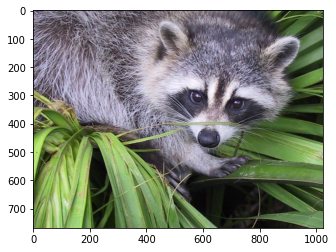

In [2]:
from scipy import misc
import matplotlib.pyplot as plt

plt.imshow(misc.face())
plt.show()

## SciPy User Guide

https://docs.scipy.org/doc/scipy/reference/tutorial/index.html 
* Introduction
* Special functions (scipy.special)
* Integration (scipy.integrate)
* Optimization (scipy.optimize)
* Interpolation (scipy.interpolate)
* Fourier Transforms (scipy.fft)
* Signal Processing (scipy.signal)
* **Linear Algebra (scipy.linalg)**
* Sparse eigenvalue problems with ARPACK
* Compressed Sparse Graph Routines (scipy.sparse.csgraph)
* Spatial data structures and algorithms (scipy.spatial)
* Statistics (scipy.stats)
* Multidimensional image processing (scipy.ndimage)
* File IO (scipy.io)

## Basic routines

In [3]:
# import libraies
import numpy as np

from numpy import linalg as LA

In [4]:
A = np.array([[1,2], [3,4]]) # --> Find inverse of A ?

```
np.asmatrix(data, dtype=None)
np.mat(data, dtype=None)
```

In [5]:
A = np.asmatrix(A, dtype=float) # or A = np.mat('[1 2;3 4]', dtype=float)
print(' A: \n {} \n\n inv(A): \n {} \n\n A.T: \n {}'.format(A, A.I, A.T))

 A: 
 [[1. 2.]
 [3. 4.]] 

 inv(A): 
 [[-2.   1. ]
 [ 1.5 -0.5]] 

 A.T: 
 [[1. 3.]
 [2. 4.]]


```
Inverse :                linalg.inv()
Transpose :              .T
Matrix multiplication :  .dot()
```

In [6]:
A = np.array([[1,2], [3,4]])
b = np.array([[0.1, -0.2]])
print(' A: \n {} \n\n b: \n {}'.format(A, b))

 A: 
 [[1 2]
 [3 4]] 

 b: 
 [[ 0.1 -0.2]]


In [7]:
A.dot(b.reshape(2,1))

array([[-0.3],
       [-0.5]])

In [8]:
# Warning!
A*b # != A.dot(b)

array([[ 0.1, -0.4],
       [ 0.3, -0.8]])

In [9]:
# Tip: * == np.multiply
np.multiply(A,b)

array([[ 0.1, -0.4],
       [ 0.3, -0.8]])

In [10]:
# Tip: @ for python 3.5+
A @ b.reshape(2,1) # @ == .dot() in 2D-array

array([[-0.3],
       [-0.5]])

In [11]:
# Warning! : @ != .dot() in nD-array, n > 2
x = np.random.rand(2,3,3) # 2 layers, 3 rows, 3 column
y = np.random.rand(2,3,3)

print(x.dot(y).shape, (x@y).shape, np.matmul(x,y).shape)

(2, 3, 2, 3) (2, 3, 3) (2, 3, 3)


In [12]:
z = np.array([[[1],[2]],[[3],[4]]])
w = np.array([[[5,6]],[[7,8]]])
zw = z.dot(w)
wz = w.dot(z)
print(zw, zw.shape)
print('\n\n')
print(wz, wz.shape)

[[[[ 5  6]
   [ 7  8]]

  [[10 12]
   [14 16]]]


 [[[15 18]
   [21 24]]

  [[20 24]
   [28 32]]]] (2, 2, 2, 2)



[[[[17]
   [39]]]


 [[[23]
   [53]]]] (2, 1, 2, 1)


Summary
```
* == np.multiply != np.dot != np.matmul == @
```

$A^{-1}$

In [13]:
A_inv = LA.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

$AA^{-1} , A^{-1}A$

In [14]:
I1 = A.dot(A_inv)
I2 = A_inv.dot(A)
print(I1, I2, sep='\n\n')

[[1.0000000e+00 0.0000000e+00]
 [8.8817842e-16 1.0000000e+00]]

[[1.00000000e+00 0.00000000e+00]
 [1.11022302e-16 1.00000000e+00]]


$A^T$

In [15]:
A.T

array([[1, 3],
       [2, 4]])

$Ab^T$

In [16]:
A.dot(b.T)

array([[-0.3],
       [-0.5]])

In [17]:
# Warning!
# b = np.array([[0.1, -0.2]]) -> 2D-array
# b.shape = (1,2)

b = np.array([0.1, -0.2]) # -> 1D-array -> b.shape = (2,)
b.T

array([ 0.1, -0.2])

In [18]:
# but!
A.dot(b)

array([-0.3, -0.5])

### Solving linear system

```
linalg.solve(A,b)
```

Solve this!
\begin{align*}
  x+3y+5z&=10\\
  2x+5y+z&=8\\
  2x+3y+8z&=3
\end{align*}

$\Longrightarrow \begin{bmatrix}
1 & 3 & 5\\
2 & 5 & 1\\
2 & 3 & 8
\end{bmatrix}\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}=\begin{bmatrix}
10 \\
8 \\
3
\end{bmatrix}\Longrightarrow \begin{bmatrix}
x \\
y \\
z
\end{bmatrix}=\begin{bmatrix}
1 & 3 & 5\\
2 & 5 & 1\\
2 & 3 & 8
\end{bmatrix}^{-1}\begin{bmatrix}
10 \\
8 \\
3
\end{bmatrix}=?$

In [19]:
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
b = np.array([[10],[8],[3]])

# solution!
sol = LA.inv(A).dot(b)
sol

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [20]:
# Check
A.dot(sol)-b

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-8.88178420e-16]])

In [21]:
# Tip: Faster method
sol = LA.solve(A,b)
sol

array([[-9.28],
       [ 5.16],
       [ 0.76]])

In [22]:
# Check
A.dot(sol)-b

array([[ 0.00000000e+00],
       [-1.77635684e-15],
       [-1.77635684e-15]])

### Finding the determinant

```
linalg.det(A)
```

In [23]:
A = np.array([[1,2], [3,4]])
LA.det(A)

-2.0000000000000004

### Computing norms

```
linalg.norm(A, ord=None, axis=None)
```

In [24]:
LA.norm(A)

5.477225575051661

In [25]:
np.sqrt(1+4+9+16)

5.477225575051661

## Decompositions

### Eigenvalues and eigenvectors

$$Av=\lambda v$$

```
eigenvalues, eigenvectors = linalg.eig(A)
```

In [26]:
A = np.array([[1,5,2],[2,4,1],[3,6,2]])
lam, v = LA.eig(A)
print(lam, v, sep='\n\n')

[ 7.9579162  -1.25766471  0.2997485 ]

[[-0.5297175  -0.90730751  0.28380519]
 [-0.44941741  0.28662547 -0.39012063]
 [-0.71932146  0.30763439  0.87593408]]


In [27]:
# check
A @ v - lam * v

array([[-2.66453526e-15,  4.44089210e-16,  2.15105711e-15],
       [-4.44089210e-16,  1.33226763e-15,  1.01307851e-15],
       [-1.77635684e-15,  8.32667268e-16,  1.66533454e-15]])

### Singular value decomposition

$$A=U\Sigma V^H$$

```
linalg.svd(A)
```

In [28]:
A = np.array([[1,5,2],[2,4,1],[3,6,2]])
u, sigma, v = LA.svd(A)
print(u, sigma, v, sep='\n\n')

[[-0.54203505  0.83667004 -0.07862088]
 [-0.45920051 -0.37324204 -0.80611741]
 [-0.7037989  -0.40084114  0.58650958]]

[9.91839161 1.25185026 0.24161707]

[[-0.36012218 -0.88419283 -0.29751481]
 [-0.88855473  0.22793076  0.39814327]
 [ 0.28422264 -0.40773841  0.86773664]]


In [29]:
A.shape

(3, 3)

In [30]:
from scipy import linalg as LA2
LA2.diagsvd(sigma, 3,3)

array([[9.91839161, 0.        , 0.        ],
       [0.        , 1.25185026, 0.        ],
       [0.        , 0.        , 0.24161707]])

In [31]:
sigma*np.eye(A.shape[0])

array([[9.91839161, 0.        , 0.        ],
       [0.        , 1.25185026, 0.        ],
       [0.        , 0.        , 0.24161707]])

In [32]:
# check
u.dot(sigma*np.eye(A.shape[0])).dot(v)

array([[1., 5., 2.],
       [2., 4., 1.],
       [3., 6., 2.]])

In [33]:
(u @ (sigma*np.eye(A.shape[0]))) @ v

array([[1., 5., 2.],
       [2., 4., 1.],
       [3., 6., 2.]])